In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [3]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)  # fg = file grouping

data = pd.read_csv(r'..\data\processed\metab_lipid_merged_df.csv', index_col=0)

In [11]:
# Takes approximately 5 minutes for 1800 data cols 
data_corr = data.T.corr('kendall')

In [12]:
data_corr

new_index,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,l_1019,l_1020,l_1021,l_1022,l_1023,l_1024,l_1025,l_1026,l_1027,l_1028
new_index,,,,,,,,,,,,,,,,,,,,,
m_0,1.000000,-0.036158,0.076836,-0.041808,-0.051977,0.062147,-0.099435,0.459887,0.065537,-0.079096,...,0.027119,-0.018079,0.023729,0.016949,0.068927,-0.040678,0.018079,-0.023729,-0.027119,0.019209
m_1,-0.036158,1.000000,0.021469,0.659887,0.105085,-0.183051,0.620339,-0.074576,0.136723,0.310734,...,0.087006,0.136723,0.101695,0.106215,0.230508,0.525424,0.138983,0.528814,0.482486,0.110734
m_2,0.076836,0.021469,1.000000,-0.160452,-0.136723,0.329944,-0.132203,0.013559,0.520904,-0.197740,...,0.416949,0.374011,0.377401,0.266667,0.250847,-0.057627,0.265537,-0.065537,-0.154802,0.348023
m_3,-0.041808,0.659887,-0.160452,1.000000,0.051977,-0.387571,0.723164,-0.003390,-0.063277,0.433898,...,-0.115254,-0.081356,-0.096045,-0.016949,0.084746,0.551412,-0.024859,0.563842,0.630508,-0.077966
m_4,-0.051977,0.105085,-0.136723,0.051977,1.000000,0.262147,0.012429,0.151412,-0.055367,-0.012429,...,-0.050847,-0.019209,-0.020339,-0.083616,-0.018079,-0.003390,-0.001130,-0.031638,-0.019209,-0.020339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_1024,-0.040678,0.525424,-0.057627,0.551412,-0.003390,-0.323164,0.509605,0.029379,-0.010169,0.425989,...,0.143503,0.157062,0.160452,0.262147,0.325424,1.000000,0.251977,0.894915,0.783051,0.187571
l_1025,0.018079,0.138983,0.265537,-0.024859,-0.001130,0.250847,-0.084746,0.072316,0.301695,-0.125424,...,0.726554,0.722034,0.768362,0.682486,0.772881,0.251977,1.000000,0.223729,0.091525,0.775141
l_1026,-0.023729,0.528814,-0.065537,0.563842,-0.031638,-0.351412,0.515254,0.028249,-0.022599,0.436158,...,0.128814,0.135593,0.148023,0.245198,0.310734,0.894915,0.223729,1.000000,0.813559,0.170621


In [ ]:
tfhm = sns.clustermap(tfcorr, vmin=-1, vmax=1, annot=False,
                      cmap='vlag', linewidths=0.75)
plt.figure(figsize=(15, 15))
# ax = plt.gca()
# ax.set_facecolor('white')

C:\Users\bjanderson23\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


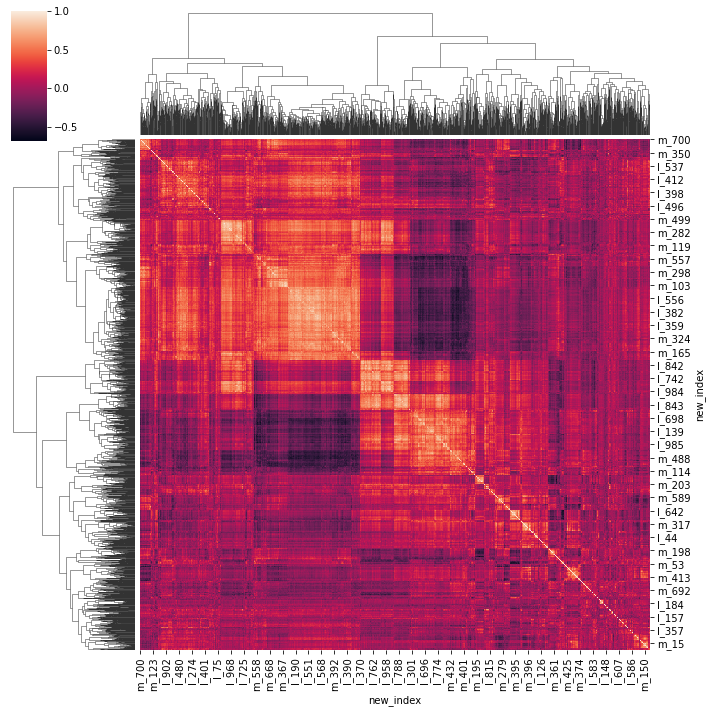

In [13]:
# data_corr.to_csv(r'..\data\processed\combined_metab_lipid_kendall_correlation.csv')

sns.clustermap(data_corr)

In [14]:
# Takes about 15 seconds on 1800 metabolites 
data_corr_pearson = data.T.corr('pearson')
data_corr_pearson.to_csv(r'..\data\processed\combined_metab_lipid_pearson_correlation.csv')


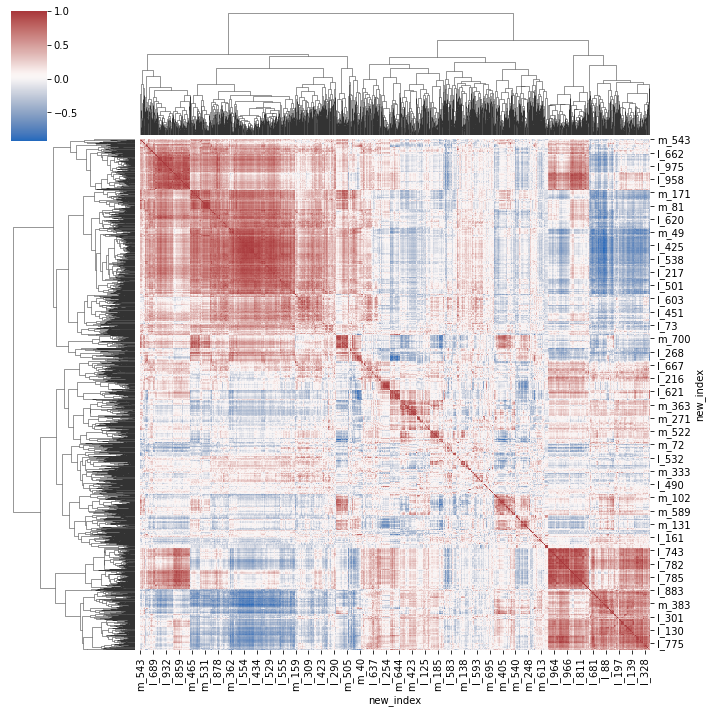

In [16]:
sns.clustermap(data_corr_pearson, cmap='vlag')

In [6]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv')
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx', index_col=0)
tf_metab_cols = tf.columns
tf_quant_filenames = metab_file_grouping[metab_file_grouping['quant_file'] == True]['File Name'].to_list()
########### IMPORTANT, REPLACING ZEROES WITH 1E3 ##################
# tf = tf.replace(0, 100)

In [7]:
fg = file_grouping.rename({'rat_label':'animal'}, axis=1).reset_index()
merge_grouping = fg[fg['quant_file'] == True].merge(metab_file_grouping, 
                    left_on=['animal', 'bg_type', 'week', 'quant_file'],
                    right_on=['animal', 'bg_type', 'week', 'quant_file'],
                    suffixes=('_lipid', '_metab'))
merge_grouping

,File Name_lipid,analytical_run_order,fr_name,animal,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance,bg,Unnamed: 0,File Name_metab,analytical_order,fixed_filename,qc_file,blank_file,gluc_tol
0,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,7,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,1076.0,FBG,True,10.0,27,2021-04-05,diabetic,71.000000,21,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,21,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,False,False,diabetic
1,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,8,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,1062.0,FBG,True,8.0,9,2021-03-22,impaired,52.333333,61,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,61,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,False,False,impaired
2,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,9,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,1093.0,FBG,True,9.0,49,2021-04-02,normal,64.000000,50,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,50,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,False,False,normal
3,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,10,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,1060.0,RBG,True,8.0,4,2021-03-25,impaired,225.000000,59,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,59,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,False,False,impaired
4,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,11,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,1091.0,FBG,True,10.0,39,2021-04-10,normal,48.500000,56,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,56,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,False,False,normal
5,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,12,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,1092.0,RBG,True,9.0,44,2021-04-06,impaired,70.500000,18,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,18,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,False,False,impaired
6,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,13,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,1093.0,RBG,True,10.0,52,2021-04-13,normal,69.500000,45,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,45,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,False,False,normal
7,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,14,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,1082.0,FBG,True,10.0,33,2021-04-05,diabetic,50.000000,41,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,41,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,False,False,diabetic
8,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,15,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,1060.0,RBG,True,9.0,6,2021-04-01,impaired,83.000000,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,False,impaired
9,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,16,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,1101.0,FBG,True,9.0,55,2021-04-02,diabetic,43.000000,44,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,44,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,False,False,diabetic


In [8]:
tf

,Acetyl-L-carnitine,Adenosine 5'-monophosphate,Cytidine 5'-diphosphocholine,DL-Carnitine,DL-Glutamine,DL-Leucine/Isoleucine,DL-Lysine,DL-Proline,Glycine,Guanosine: all right MS2,...,L-Tyrosine,L-Valine,Nicotinamide,O-Butyryl-L-carnitine,O-Isovaleryl-L-carnitine: rt a little shift,Pantothenic acid,Propionylcarnitine,Threonine,Tryptophan,α-Lactose
20210831_KAO_HILIC_ACN_20210831232610,2.257726e+04,2.194400e+05,0.000000,0.000000e+00,0.000000e+00,2.089273e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
20210831_KAO_HILIC_extraction_blank_1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.234542e+04,1.767827e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.356500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.913862e+05,0.000000e+00,20411.529395
20210831_KAO_HILIC_extraction_blank_1_20210901004002,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.977614e+04,2.068825e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.361496e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,22247.587290
20210831_KAO_HILIC_human_plasma_1,1.349962e+07,1.963570e+04,11313.341075,4.297005e+07,1.978960e+08,2.702475e+07,8.739398e+06,2.072207e+07,1.284400e+06,0.000000e+00,...,9.227118e+06,8.171787e+06,6.706173e+05,7.060727e+05,1.638245e+06,103246.039764,1.206942e+06,2.670877e+07,3.625402e+06,334542.852557
20210831_KAO_HILIC_human_plasma_2,1.404424e+07,3.692582e+04,21254.388456,4.334441e+07,1.354963e+08,4.882924e+07,9.202445e+06,2.576817e+07,8.038567e+05,0.000000e+00,...,9.835222e+06,1.909940e+07,6.300744e+05,8.915883e+05,1.521979e+06,476705.475841,1.223082e+06,2.524489e+07,4.133652e+06,150192.203589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,9.900185e+07,1.585914e+06,83522.481546,3.184427e+07,1.414438e+08,3.402026e+07,1.162575e+07,1.087277e+07,1.970609e+06,5.681028e+05,...,8.580922e+06,1.336760e+07,5.788250e+06,8.660981e+05,1.813145e+06,486468.346229,1.421424e+06,1.655164e+07,4.369452e+06,132854.565044
20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,1.139366e+08,9.586290e+05,67111.535109,2.552895e+07,1.203286e+08,2.503039e+07,1.166529e+07,8.706379e+06,1.730554e+06,4.058541e+05,...,8.157158e+06,9.122812e+06,3.887001e+06,7.524836e+05,1.932471e+06,352076.659413,1.253382e+06,1.611318e+07,4.847306e+06,39725.816577
20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,4.859275e+07,1.138970e+06,100112.114384,4.506856e+07,1.271040e+08,1.079708e+08,1.483510e+07,1.971799e+07,2.297562e+06,1.028787e+06,...,9.745709e+06,4.225649e+07,6.843826e+06,1.104399e+06,5.845325e+06,190565.028425,7.350783e+06,3.302676e+07,6.498828e+06,148418.615887
20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,1.008235e+08,9.379053e+05,34793.936649,3.472707e+07,1.329792e+08,3.225403e+07,1.152360e+07,1.287038e+07,2.448366e+06,5.030360e+05,...,7.044028e+06,1.216562e+07,2.654619e+06,9.889602e+05,2.414047e+06,421918.197078,1.975672e+06,1.574682e+07,5.787762e+06,105873.609933


In [9]:
tfcorr = tf.corr('kendall')

In [10]:
tfcorr

,Acetyl-L-carnitine,Adenosine 5'-monophosphate,Cytidine 5'-diphosphocholine,DL-Carnitine,DL-Glutamine,DL-Leucine/Isoleucine,DL-Lysine,DL-Proline,Glycine,Guanosine: all right MS2,...,L-Tyrosine,L-Valine,Nicotinamide,O-Butyryl-L-carnitine,O-Isovaleryl-L-carnitine: rt a little shift,Pantothenic acid,Propionylcarnitine,Threonine,Tryptophan,α-Lactose
Acetyl-L-carnitine,1.000000,0.270971,0.039604,-0.209578,0.150604,-0.187486,0.106766,-0.365993,0.294815,0.008836,...,-0.153238,-0.198155,0.193761,0.097979,0.020650,0.378295,-0.010105,-0.240668,-0.010105,-0.179583
Adenosine 5'-monophosphate,0.270971,1.000000,0.252586,0.148946,0.222613,0.153238,0.317663,0.127856,0.373902,0.328700,...,0.199780,0.202548,0.445079,0.199912,0.203427,0.207821,0.207821,0.163373,0.248243,-0.028540
Cytidine 5'-diphosphocholine,0.039604,0.252586,1.000000,0.365398,0.042235,0.497142,0.298482,0.277350,0.353071,0.417445,...,0.432909,0.494828,0.222761,0.323135,0.418226,-0.042263,0.456087,0.394280,0.593441,0.285086
DL-Carnitine,-0.209578,0.148946,0.365398,1.000000,0.283330,0.479245,0.217582,0.606154,0.159560,0.121107,...,0.589062,0.462857,0.151648,0.393407,0.442637,0.026813,0.531429,0.525923,0.492747,0.341313
DL-Glutamine,0.150604,0.222613,0.042235,0.283330,1.000000,0.110623,0.075994,0.265759,0.348342,0.045937,...,0.327480,0.127828,0.010103,0.148034,-0.001318,0.363277,0.031188,0.189243,0.127828,0.141352
DL-Leucine/Isoleucine,-0.187486,0.153238,0.497142,0.479245,0.110623,1.000000,0.298265,0.603997,0.199868,0.456723,...,0.565408,0.896552,0.195476,0.342192,0.512629,-0.008346,0.589062,0.781120,0.587305,0.481124
DL-Lysine,0.106766,0.317663,0.298482,0.217582,0.075994,0.298265,1.000000,0.221099,0.265055,0.202434,...,0.276301,0.264176,0.466374,0.556923,0.518242,-0.170110,0.503297,0.322056,0.336264,0.095322
DL-Proline,-0.365993,0.127856,0.277350,0.606154,0.265759,0.603997,0.221099,1.000000,0.092747,0.264313,...,0.585548,0.628132,0.109451,0.303736,0.396923,0.049670,0.478681,0.678823,0.418901,0.381726
Glycine,0.294815,0.373902,0.353071,0.159560,0.348342,0.199868,0.265055,0.092747,1.000000,0.300557,...,0.279816,0.207912,0.221978,0.291429,0.250989,0.181538,0.229011,0.151582,0.341538,0.109378
Guanosine: all right MS2,0.008836,0.328700,0.417445,0.121107,0.045937,0.456723,0.202434,0.264313,0.300557,1.000000,...,0.204951,0.479123,0.202434,0.154698,0.304977,0.067183,0.298789,0.372880,0.314701,0.271207


In [10]:
tf.columns

Index(['Acetyl-L-carnitine', 'Adenosine 5'-monophosphate',
       'Cytidine 5'-diphosphocholine', 'DL-Carnitine', 'DL-Glutamine',
       'DL-Leucine/Isoleucine', 'DL-Lysine', 'DL-Proline', 'Glycine',
       'Guanosine: all right MS2', 'Indole-3-acrylic acid', 'L-(+)-Arginine',
       'L-(+)-Citrulline', 'L(+)-Ornithine', 'L-Alanine', 'L-Aspartic acid',
       'L-Glutamic acid', 'L-Iditol to Six-carbon sugar alcohol',
       'L-Phenylalanine', 'L-Serine', 'L-Tyrosine', 'L-Valine', 'Nicotinamide',
       'O-Butyryl-L-carnitine', 'O-Isovaleryl-L-carnitine: rt a little shift',
       'Pantothenic acid', 'Propionylcarnitine', 'Threonine', 'Tryptophan',
       'α-Lactose'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

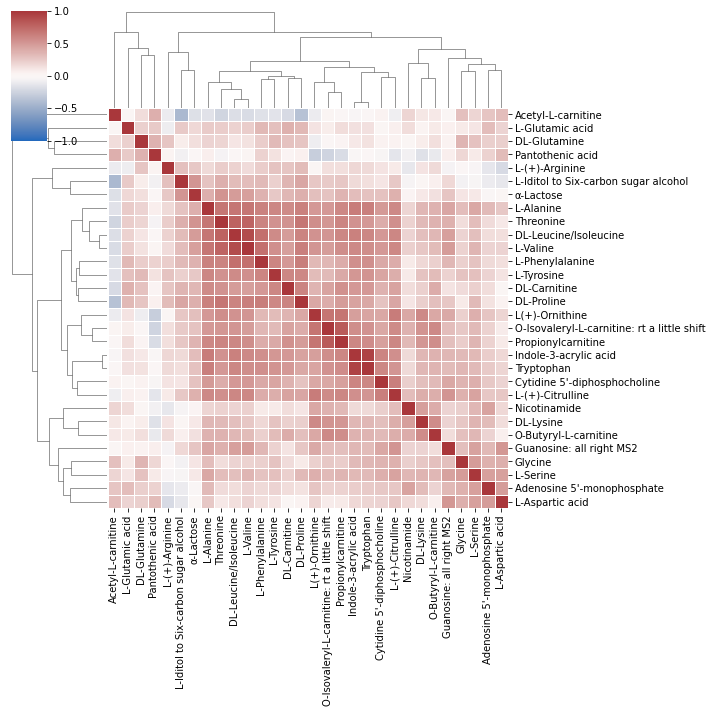

<Figure size 1080x1080 with 0 Axes>

In [15]:
tfhm = sns.clustermap(tfcorr, vmin=-1, vmax=1, annot=False,
                      cmap='vlag', linewidths=0.75)
plt.figure(figsize=(15, 15))
# ax = plt.gca()
# ax.set_facecolor('white')

In [72]:
lip_met_map = dict(zip(merge_grouping[ 'File Name_metab'], merge_grouping['fr_name']))
lip_met_map

{'20210831_KAO_HILIC_T1076M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)',
 '20210831_KAO_HILIC_T1062M_20210322_8wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)',
 '20210831_KAO_HILIC_T1093M_20210402_9wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)',
 '20210831_KAO_HILIC_T1060M_20210325_8wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)',
 '20210831_KAO_HILIC_T1091M_20210410_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)',
 '20210831_KAO_HILIC_T1092M_20210406_9wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)',
 '20210831_KAO_HILIC_T1093M_20210413_10wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52)',
 '20210831_KAO_HILIC_T1082M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33)',
 '20210831_KAO_HILIC_T1060M_20210401_9wk_RBG': '20210729_AJ_Toh_Ra

In [74]:
tft = tf.T
tft = tft[tf_quant_filenames].rename(lip_met_map, axis=1)

In [80]:
combined_corr = fr_filt[fr_quant_filenames_in_analytical_order].append(tft, sort=True).T.corr('kendall')
combined_corr

,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,L-Tyrosine,L-Valine,Nicotinamide,O-Butyryl-L-carnitine,O-Isovaleryl-L-carnitine: rt a little shift,Pantothenic acid,Propionylcarnitine,Threonine,Tryptophan,α-Lactose
unknown_679.05463_0.536,1.000000,0.477966,0.338983,0.355932,0.267797,0.419209,0.327684,0.192090,0.281356,0.236158,...,0.124294,0.046328,0.119774,0.152542,0.140113,-0.297175,0.136723,0.082486,0.029379,0.010169
unknown_641.1087_0.537,0.477966,1.000000,0.375141,0.398870,0.358192,0.604520,0.503955,0.259887,0.435028,0.387571,...,-0.036158,-0.109605,0.146893,0.030508,-0.027119,-0.084746,-0.059887,-0.118644,-0.101695,-0.134463
unknown_951.15973_0.541,0.338983,0.375141,1.000000,0.280226,0.427119,0.501695,0.543503,0.179661,0.580791,0.508475,...,0.161582,0.189831,0.037288,0.061017,0.134463,-0.117514,0.133333,0.158192,0.120904,0.018079
unknown_329.03067_0.542,0.355932,0.398870,0.280226,1.000000,0.297175,0.227119,0.268927,0.433898,0.249718,0.123164,...,0.169492,0.096045,-0.061017,0.136723,0.230508,-0.292655,0.184181,0.136723,0.187571,0.019209
unknown_969.13147_0.544,0.267797,0.358192,0.427119,0.297175,1.000000,0.435028,0.420339,0.122034,0.383051,0.331073,...,0.067797,0.141243,0.099435,-0.003390,0.063277,-0.206780,0.032768,0.114124,0.090395,0.032768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pantothenic acid,-0.297175,-0.084746,-0.117514,-0.292655,-0.206780,-0.066667,0.058757,-0.074576,0.050847,0.105085,...,-0.029379,-0.141243,-0.099435,-0.229379,-0.359322,1.000000,-0.328814,-0.213559,-0.099435,-0.132203
Propionylcarnitine,0.136723,-0.059887,0.133333,0.184181,0.032768,-0.062147,-0.063277,0.036158,-0.039548,-0.114124,...,0.424859,0.525424,0.223729,0.484746,0.806780,-0.328814,1.000000,0.624859,0.492655,0.360452
Threonine,0.082486,-0.118644,0.158192,0.136723,0.114124,-0.046328,0.018079,0.015819,0.068927,0.001130,...,0.481356,0.767232,0.194350,0.328814,0.533333,-0.213559,0.624859,1.000000,0.472316,0.468927
Tryptophan,0.029379,-0.101695,0.120904,0.187571,0.090395,-0.103955,-0.028249,0.053107,-0.004520,-0.047458,...,0.557062,0.508475,0.028249,0.262147,0.457627,-0.099435,0.492655,0.472316,1.000000,0.257627


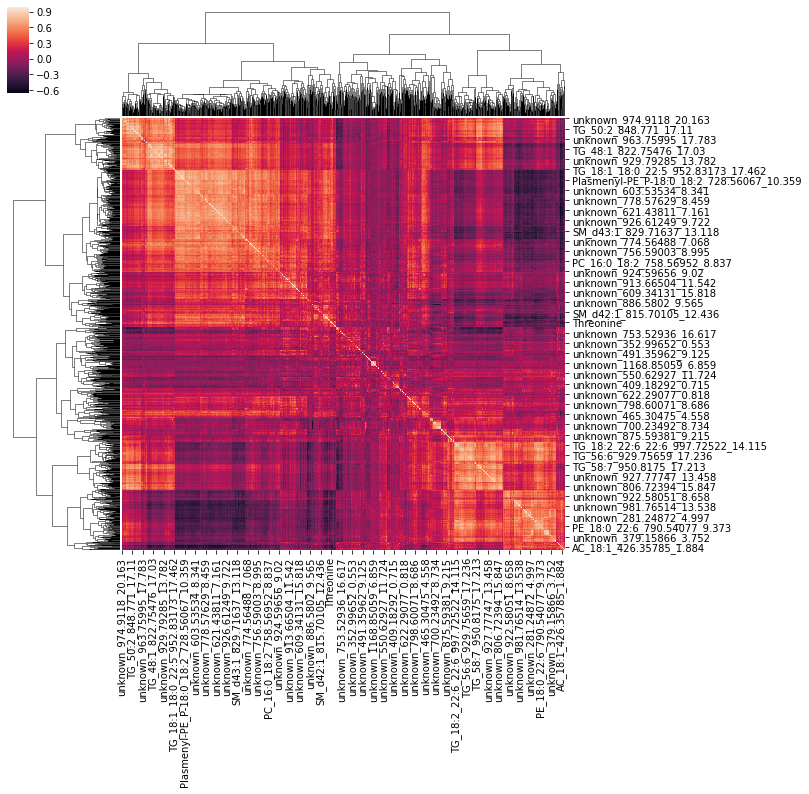

In [81]:
combined_corr.to_csv(r'..\data\interim\combined_metab_lipid_kendall_correlation.csv')

sns.clustermap(combined_corr)

In [30]:
import pymsfilereader
from statistics import median

rf = pymsfilereader.MSFileReader(r'D:\nile_rat_multiomics\data\raw\lipidomics\20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw')



In [20]:
rf.GetMSOrderForScanNum(0)

1

In [40]:
rf.GetScanHeaderInfoForScanNum(1)['TIC']

1061301.1

In [36]:
(rf.GetMassListFromScanNum(1)[0][1])

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 870.0029907226562,
 1455.0115966796875,
 1614.597900390625,
 1210.8140869140625,
 550.6863403320312,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 975.3119506835938,
 1797.6336669921875,
 2122.625,
 1691.9617919921875,
 870.328857421875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 656.5678100585938,
 1288.2142333984375,
 1611.1044921875,
 1381.13330078125,
 772.30810546875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 269.8367614746094,
 1240.843505859375,
 5160.52734375,
 6567.2041015625,
 5115.33544921875,
 2513.05908203125,
 0.0,
 0.0,
 0.0,
 616.3969116210938,
 2487.417724609375,
 2652.264404296875,
 1455.686767578125,
 675.36767578125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 44.35694885253906,
 911.9783325195312,
 3364.202880859375,
 6661.81005859375,
 10080.736328125,
 9820.7177734375,
 6242.3154296875,
 2923.286865234375,
 592.310546875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 790.5175170898438,
 1336

In [76]:
import glob
import pymsfilereader

yyz_rawfiles = glob.glob(r"T:\File_exchange\Ben\from Yunyun\*")

def get_median_ms1_intensity_per_file(rf_path):
    
    rf = pymsfilereader.MSFileReader(rf_path)
    
    ms1_total_intensity_list = []

    total_max = 0
    max_tic = 0

    for i in range(1, rf.LastSpectrumNumber, ):
        if rf.GetMSOrderForScanNum(i) == 1:
            mass_list = rf.GetMassListFromScanNum(i)[0][1]
            total_intensity = sum(mass_list)
            ms1_total_intensity_list.append(total_intensity)

            max_intensity = max(mass_list)
            if max_intensity > total_max:
                total_max = max_intensity

            if rf.GetScanHeaderInfoForScanNum(i)['TIC'] > max_tic:
                max_tic = rf.GetScanHeaderInfoForScanNum(i)['TIC']

    rf_name = rf_path.split('\\')[-1]
                
    print(f'filename = {rf_name}', 'median: ', median(ms1_total_intensity_list))
    
for rawfile in yyz_rawfiles:
    get_median_ms1_intensity_per_file(rawfile)

filename = 20210823_LCMS_10.raw median:  26764793.62548828
filename = 20210823_LCMS_11.raw median:  27460067.618408203
filename = 20210823_LCMS_12.raw median:  24511294.426635742
filename = 20210823_LCMS_13.raw median:  25808377.559448242
filename = 20210823_LCMS_14.raw median:  26328303.01196289
filename = 20210823_LCMS_2_N2ctrl.raw median:  27586492.35913086
filename = 20210823_LCMS_3.raw median:  26984750.303222656
filename = 20210823_LCMS_5.raw median:  27353532.024169922
filename = 20210823_LCMS_6.raw median:  25270241.49584961
filename = 20210823_LCMS_8.raw median:  26406539.869873047
filename = 20210823_LCMS_9.raw median:  24413811.8125


Text(0, 0.5, 'number of scans')

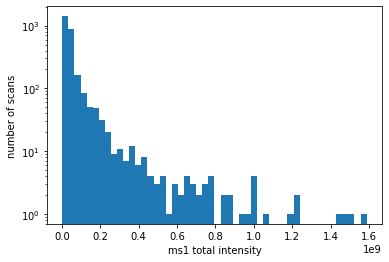

In [63]:
import matplotlib.pyplot as plt
# plt.xscale('log')
plt.yscale('log')
plt.hist(ms1_total_intensity_list, bins=50)
ax = plt.gca()
plt.xlabel('ms1 total intensity')
plt.ylabel('number of scans')

In [ ]:
import glob



In [52]:
ms1_total_intensity_list

[3983479.95470047,
 4126131.1558594704,
 4262062.297125816,
 4904748.479049683,
 4097705.3924999237,
 4484533.237933159,
 4014374.0347186923,
 4413090.273082733,
 4280934.403457642,
 4718189.1094379425,
 4383920.1258125305,
 4556504.640295029,
 4105380.9269123077,
 4611460.214609444,
 4412359.776208878,
 4638642.161142826,
 4391921.92498672,
 4315890.016906738,
 4234754.202792972,
 4419189.801195145,
 4116921.750310898,
 4178950.1835746765,
 4195616.523674011,
 4443261.720359802,
 4368028.746545792,
 4326313.990571499,
 4440375.541042805,
 4635385.640730143,
 4246745.003452003,
 4917975.561889648,
 4515874.509599686,
 4851164.213189125,
 4412675.421015263,
 4818701.004081726,
 4386689.447919846,
 4499400.427754402,
 4596619.996593952,
 4702583.1244392395,
 4361510.104909897,
 4555579.165172577,
 4624018.894935608,
 4744322.835302353,
 4668464.886313677,
 5228892.8507733345,
 4845019.367460251,
 4746108.797758102,
 4842012.032402992,
 4905975.460783482,
 4653617.004796028,
 5103996.0315